In [1]:
#pytorch lib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms,models
from torch.utils.data import Dataset,random_split
import torch.optim as optim


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,shutil,warnings
import glob
import random 
import rasterio
import json

from tqdm import tqdm
from PIL import Image
from IPython.display import display
from torchvision import transforms
from typing import Tuple, Dict, List

from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


random.seed(69)


In [2]:
img_path = "datasets/yucars_project/H30_Hokkaido-Atsuma_Landslide_Earthquake/NDI_(5,5)(1,1)_ALOS2231542750-180906-UBSR_M180906_DEM_S170615_170824_171116_180517_180614_180823_dB_TC_Stack.tif"
import rasterio

dataset = rasterio.open(img_path)

print(f"Driver: {dataset.driver}")
print(f"Width: {dataset.width}")
print(f"Height: {dataset.height}")
print(f"Count of bands: {dataset.count}")
print(f"CRS: {dataset.crs}")
print(f"Transform: {dataset.transform}")

Driver: GTiff
Width: 38425
Height: 32132
Count of bands: 1
CRS: EPSG:4326
Transform: | 0.00, 0.00, 141.52|
| 0.00,-0.00, 43.30|
| 0.00, 0.00, 1.00|


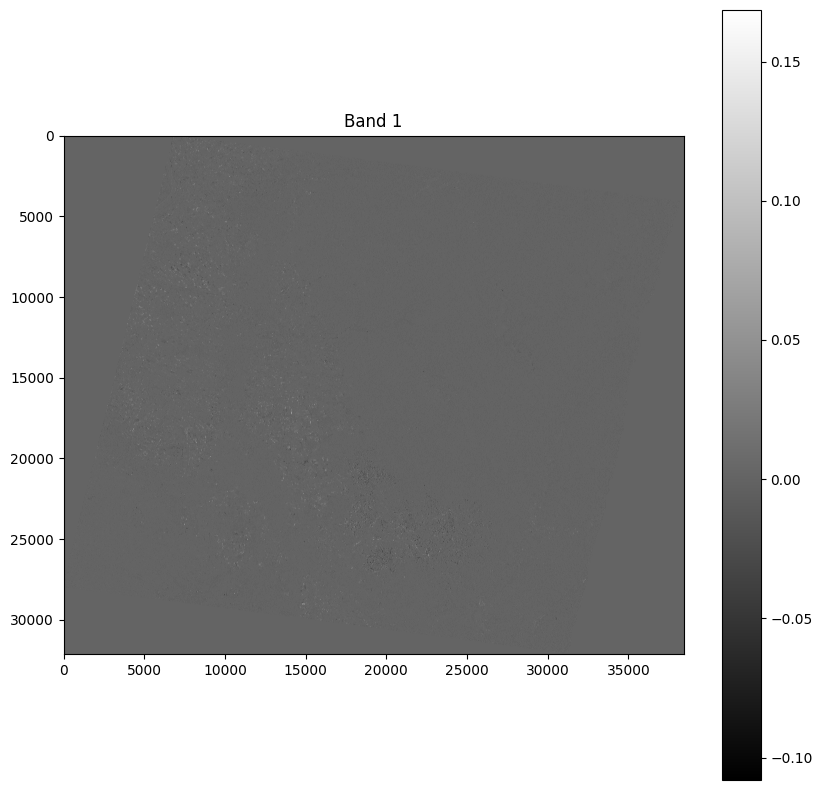

In [3]:
import matplotlib.pyplot as plt

# Read the first band
band1 = dataset.read(1)

# Display the first band
plt.figure(figsize=(10, 10))
plt.imshow(band1, cmap='gray')
plt.title('Band 1')
plt.colorbar()
plt.show()

In [4]:
import numpy as np

# Calculate basic statistics
print(f"Min value: {band1.min()}")
print(f"Max value: {band1.max()}")
print(f"Mean value: {band1.mean()}")
print(f"Standard Deviation: {band1.std()}")

Min value: -0.1080518364906311
Max value: 0.16850990056991577
Mean value: -0.00017683819169178605
Standard Deviation: 0.003489529015496373


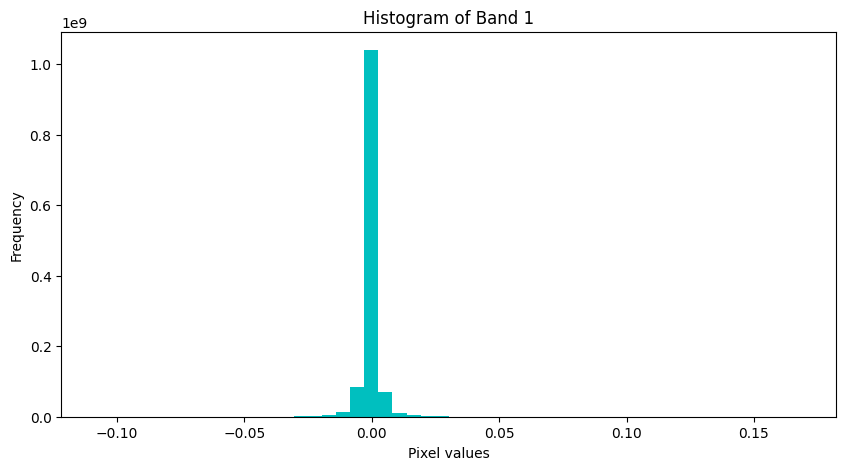

In [5]:
# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(band1.flatten(), bins=50, color='c')
plt.title('Histogram of Band 1')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
band = dataset.read(1)
plt.figure(figsize=(10, 10))
plt.imshow(band, cmap='gray')
plt.title(f'Band {1}')
plt.colorbar()
plt.show()